# Create Data for PCA

In [20]:
import numpy as np
import math
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA as sklearnPCA


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Create Cell Data

In [6]:
np.random.seed(4294967295) # random seed for consistency

# Cell 1 Data

In [130]:
#Set parameters
mean_cell1 = [8] * 10
cov = np.identity(10) 
cell1 = np.random.multivariate_normal(mean_cell1, cov, 30)
shape(cell1)

(30, 10)

# Cell 2 Data

In [131]:
mean_cell2 = [4] * 10
cov = np.identity(10) 
cell2 = np.random.multivariate_normal(mean_cell2, cov, 30)
shape(cell2)

(30, 10)

# (erroneous) Dimension Viz + Plot without Drop Out 

In [203]:
#Cell 1 PCA
pca1 = sklearnPCA(n_components=10)
fitted1 = pca1.fit(t)
trans1 = pca1.transform(t)
shape(t)

(60, 10)

In [198]:
#Cell 2 PCA
pca2 = sklearnPCA(n_components=10)
fitted2 = pca2.fit(cell2)
trans2 = pca2.transform(cell2) 

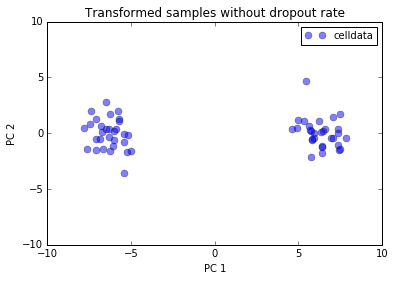

In [222]:
plt.plot(trans1[:,0], trans1[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='celldata')
#plt.plot(trans2[:,0], trans2[:,1], '^', markersize=7, color='red', alpha=0.5, label='cell2')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.legend()
plt.title('Transformed samples without dropout rate')

plt.show()

In [202]:
t = np.concatenate((cell1, cell2))
t

array([[  7.37784118,   8.21185529,   8.47378174,   7.3997479 ,
          8.20001601,   8.13555432,   8.00040499,   7.43485472,
          9.73559121,   9.97500731],
       [  9.90258417,   8.47512762,   8.49853541,   7.91911927,
          6.40164327,   8.70030641,   9.11352142,   5.75465278,
          5.97000255,   7.33511954],
       [  8.42150314,   8.49901972,   8.20472502,   8.57367496,
          6.60697164,   8.645657  ,   7.15497538,   7.32470963,
          7.54431849,   7.85651906],
       [  7.02331696,   7.82561745,   7.48179152,   8.43409969,
          9.30470311,   8.58640712,   8.47568231,   7.0847088 ,
          5.98513328,   7.11236132],
       [  7.54389869,   7.4810718 ,   9.14285604,   8.07880806,
          6.74766652,   7.56655793,   8.36897882,   8.70322181,
          8.14485872,   9.23557585],
       [  7.90656406,   7.82522386,   9.61173934,   7.04935569,
          8.24224513,   8.79165229,   8.56834874,   7.69250516,
          8.00091255,  10.19629433],
       [  

In [226]:
trans1[:,3]

array([-0.16507284, -0.34217787, -1.06162848,  0.03739794, -1.60778471,
       -0.88188727,  1.49335271, -0.32663258,  1.30254156, -1.35150513,
        2.6900349 ,  1.33774742, -0.06124605, -0.71673533, -2.49878817,
        0.67768756,  0.1861604 ,  0.87254741, -0.57021259,  1.74449267,
        0.82062807, -1.03446836, -2.09259704,  0.24858559,  1.14864297,
        1.15675534, -0.96347468, -1.76590208,  1.70934301,  0.30812289,
        0.01617526, -0.85734449,  0.73568413,  0.65261324,  1.8031971 ,
       -0.2433268 ,  0.8894858 , -0.31733451, -0.53084013,  0.74900503,
       -0.00676246,  0.49068766, -0.4061492 ,  1.28146525, -2.01344443,
        1.68912257, -1.26016438, -0.17916825, -1.51281944, -0.52018283,
       -1.83202615,  1.10028904, -0.10078643,  0.47509235, -0.40118852,
       -1.6978195 ,  1.06361525,  0.42062586, -0.95833374,  1.17670546])

# Drop out rate parameters

In [190]:
def drop_out(exp):
    p = math.e**(-.01 * exp**2)
    return np.random.binomial(1, p, 1)[0]

In [191]:
noise_1 = .1 * np.random.randn(shape(cell1)[0], shape(cell1)[1]) 
noise_2 = .1 * np.random.randn(shape(cell2)[0], shape(cell2)[1]) 

In [192]:
nsd1 = np.copy(cell1) + np.copy(noise_1)
nsd2 = np.copy(cell2) + np.copy(noise_2)

In [193]:
count = 0
for (i,j), value in numpy.ndenumerate(nsd1):
    if (drop_out(value) == 1):
        count += 1
        nsd1[i,j] = 0
print count

171


In [195]:
shape(nsd1)

(30, 10)